## 1 Practical
As you have seen in the lecture, there are several ways to visualize the features extracted by a
neural network. Here, we will focus on two dimensionality reduction techniques for visualizing
high-dimensional vectors: PCA and t-SNE.

>**NOTE:** You can use the CNN (not pretrained) from the previous exercise, which you had used for MNIST task for extracting the features. Else you are also allowed to write a basic CNN with 2-3 convolutional layers for extracting the features. The flattened output of the convolutional layers (not the classifier or fully connected layers) are the high dimensional features, which you will use for feature visualization employing PCA and t-SNE.
### 1.1 Task
#### 1. Train CNN on MNIST with learning rate 1e-6 (very small) and for one epoch only.


In [26]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

#prepare MINST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#reshape
train_images = np.reshape(train_images, (train_images.shape[0], train_images.shape[1], train_images.shape[2], 1))
test_images = np.reshape(test_images, (test_images.shape[0], test_images.shape[1], test_images.shape[2], 1))
#normalize
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
#convert each labels to one-hot vector
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


#CNN model with LeakyRelu activation function & Adam optimizer
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(28,28,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

#compile the model
model.compile(optimizer=Adam(learning_rate=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])

#train the model
model.fit(train_images, train_labels, epochs=1, batch_size=32)

#test the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
plt.show()
print("Test accuracy:", test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 2.2818 - accuracy: 0.1606
Test accuracy: 0.16060000658035278


#### 2. Extract the features from that model


In [27]:
#extract the features for the training and test datasets
train_features = model.predict(train_images)
test_features = model.predict(test_images)

#print the shape of the extracted features
print("Shape of train features:", train_features.shape)
print("Shape of test features:", test_features.shape)

313/313 [==============================] - 1s 4ms/step
Shape of train features: (60000, 10)
Shape of test features: (10000, 10)


#### 3. Visualize the features both with PCA and t-SNE


C:\Users\trica\AppData\Local\Temp\ipykernel_9368\2108721591.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_features_pca[:,0], reduced_features_pca[:,1], c=test_labels_rgba, cmap='jet')


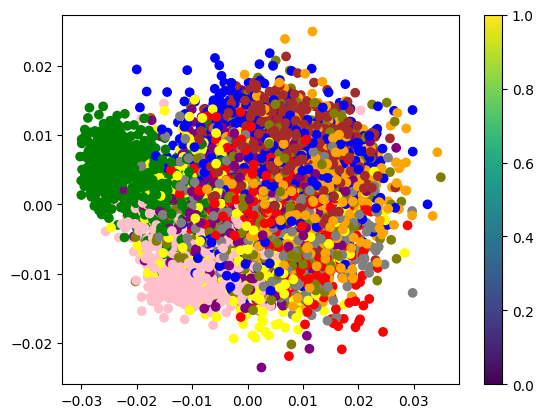

C:\Users\trica\AppData\Local\Temp\ipykernel_9368\2108721591.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_features_tsne[:,0], reduced_features_tsne[:,1], c=test_labels_rgba, cmap='jet')


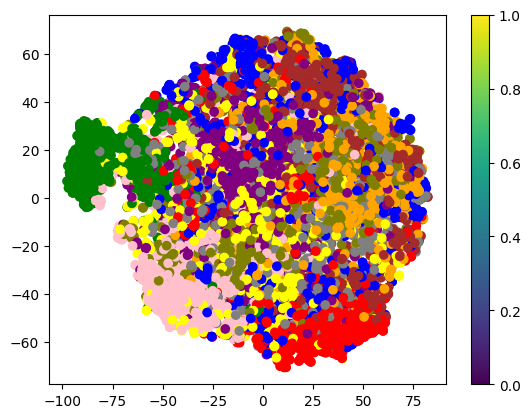

In [28]:
#imports
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.colors as colors

#use PCA to reduce the dimensions of the features to 10
pca = PCA(n_components=10)
reduced_features_pca = pca.fit_transform(test_features)

#use t-SNE to further reduce the dimensions of the features to 2
tsne = TSNE(n_components=2)
reduced_features_tsne = tsne.fit_transform(test_features)

# Convert one-hot encoded labels to class labels
test_labels = np.argmax(test_labels, axis=1)

# Define a colormap
cmap = colors.ListedColormap(['red', 'green', 'blue', 'purple', 'orange', 'yellow', 'brown', 'pink', 'gray', 'olive'])

# Convert class labels to an RGBA sequence
test_labels_rgba = cmap(test_labels)

#plot the reduced features using scatter plot
plt.scatter(reduced_features_pca[:,0], reduced_features_pca[:,1], c=test_labels_rgba, cmap='jet')
plt.colorbar()
plt.show()

plt.cla()
plt.scatter(reduced_features_tsne[:,0], reduced_features_tsne[:,1], c=test_labels_rgba, cmap='jet')
plt.colorbar()
plt.show()

#### 4. Train CNN on MNIST with learning rate 1e-3 and for 10-20 epochs


Epoch 1/15
1875/1875 [==============================] - 19s 9ms/step - loss: 0.1894 - accuracy: 0.9424
Epoch 2/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0594 - accuracy: 0.9814
Epoch 3/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0436 - accuracy: 0.9865
Epoch 4/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0345 - accuracy: 0.9893
Epoch 5/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0288 - accuracy: 0.9908
Epoch 6/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0229 - accuracy: 0.9925
Epoch 7/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0199 - accuracy: 0.9932
Epoch 8/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0179 - accuracy: 0.9940
Epoch 9/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0158 - accuracy: 0.9950
Epoch 10/15
1875/1875 [==============================] - 17s 9ms/step - 

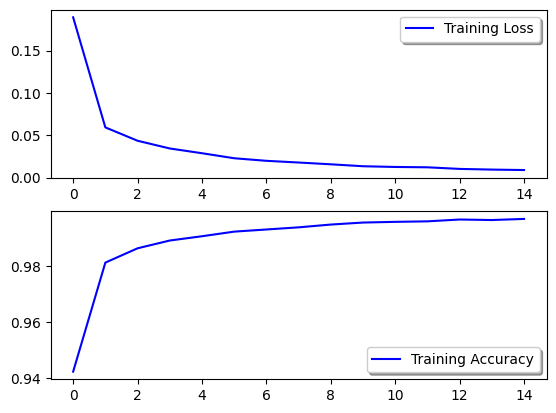

Test accuracy: 0.9909999966621399


In [30]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

#prepare MINST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#reshape
train_images = np.reshape(train_images, (train_images.shape[0], train_images.shape[1], train_images.shape[2], 1))
test_images = np.reshape(test_images, (test_images.shape[0], test_images.shape[1], test_images.shape[2], 1))
#normalize
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
#convert each labels to one-hot vector
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


#CNN model with LeakyRelu activation function & Adam optimizer
model2 = Sequential()
model2.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(28,28,1)))
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(units=120, activation='relu'))
model2.add(Dense(units=84, activation='relu'))
model2.add(Dense(units=10, activation='softmax'))

#compile the model
model2.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

#train the model
history = model2.fit(train_images, train_labels, epochs=15, batch_size=32)

#evaluating the accuracy of the feature extractor on the test set
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)
#test the model
test_loss, test_acc = model2.evaluate(test_images, test_labels)
plt.show()
print("Test accuracy:", test_acc)

#### 5. Repeat steps 2 and 3 for this model too


313/313 [==============================] - 2s 5ms/step
Shape of train features: (60000, 10)
Shape of test features: (10000, 10)


C:\Users\trica\AppData\Local\Temp\ipykernel_9368\1035708346.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_features_pca[:,0], reduced_features_pca[:,1], c=test_labels_rgba, cmap='jet')


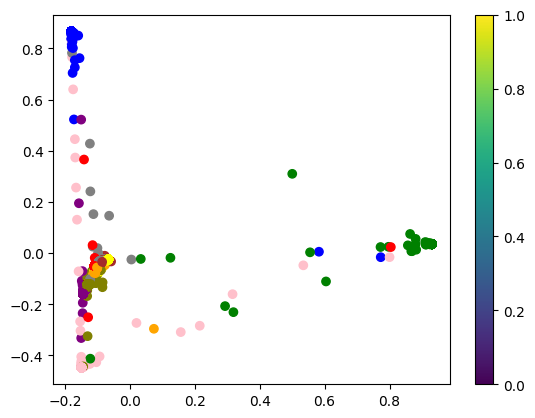

C:\Users\trica\AppData\Local\Temp\ipykernel_9368\1035708346.py:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_features_tsne[:,0], reduced_features_tsne[:,1], c=test_labels_rgba, cmap='jet')


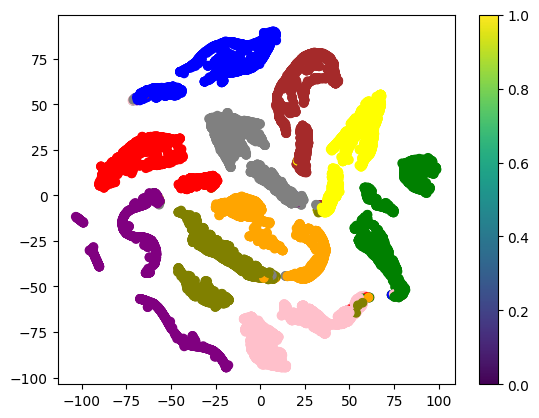

In [31]:
#imports
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.colors as colors

#extract the features for the training and test datasets
train_features = model2.predict(train_images)
test_features = model2.predict(test_images)

#print the shape of the extracted features
print("Shape of train features:", train_features.shape)
print("Shape of test features:", test_features.shape)

#use PCA to reduce the dimensions of the features to 10
pca = PCA(n_components=10)
reduced_features_pca = pca.fit_transform(test_features)

#use t-SNE to further reduce the dimensions of the features to 2
tsne = TSNE(n_components=2)
reduced_features_tsne = tsne.fit_transform(test_features)

# Convert one-hot encoded labels to class labels
test_labels_one_hot = np.argmax(test_labels, axis=1)

# Define a colormap
cmap = colors.ListedColormap(['red', 'green', 'blue', 'purple', 'orange', 'yellow', 'brown', 'pink', 'gray', 'olive'])

# Convert class labels to an RGBA sequence
test_labels_rgba = cmap(test_labels_one_hot)

#plot the reduced features using scatter plot
plt.scatter(reduced_features_pca[:,0], reduced_features_pca[:,1], c=test_labels_rgba, cmap='jet')
plt.colorbar()
plt.show()

plt.cla()
plt.scatter(reduced_features_tsne[:,0], reduced_features_tsne[:,1], c=test_labels_rgba, cmap='jet')
plt.colorbar()
plt.show()

#### 6. Report the 4 visualization images and BRIEFLY comment on the differences 
- a) between PCA and t-SNE

**ANSWER:** t-SNE differs from PCA by preserving only small pairwise distances or local similarities whereas PCA is concerned with preserving large pairwise distances to maximize variance. We can see that here, where in PCA the differents points are mostly mixed up together whereas in t-SNE are we can see more or less distinct packs of points for each color.

- b) the first model (virtually not trained at all) and the second one.

**ANSWER:** In the second model the classes are really distinct and seperate from each other, with some spaces between them. Whereas in the first model the vizualisation of the classes are packed together. 

### 1.2 Resources
- t-SNE
- PCA
- PCA-sklearn